In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
cd /content/drive/My Drive/dataset/

/content/drive/My Drive/dataset


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('./training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')#categorical

Found 1546 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                   rescale = 1./255)
test_set = test_datagen.flow_from_directory('./test_set',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            shuffle=False,
                                            class_mode = 'categorical')#categorical


Found 360 images belonging to 3 classes.


In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
model.add(Dropout(0.3))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
model.fit(x = training_set, validation_data = test_set, epochs = 100,callbacks=[early_stop])

Epoch 1/100
155/155 [==============================] - 36s 231ms/step - loss: 0.8278 - accuracy: 0.6391 - val_loss: 0.4085 - val_accuracy: 0.8444
Epoch 2/100
155/155 [==============================] - 36s 229ms/step - loss: 0.4517 - accuracy: 0.8221 - val_loss: 0.3333 - val_accuracy: 0.8694
Epoch 3/100
155/155 [==============================] - 35s 226ms/step - loss: 0.3260 - accuracy: 0.8823 - val_loss: 0.2448 - val_accuracy: 0.9028
Epoch 4/100
155/155 [==============================] - 35s 228ms/step - loss: 0.2475 - accuracy: 0.9069 - val_loss: 0.2360 - val_accuracy: 0.9167
Epoch 5/100
155/155 [==============================] - 35s 227ms/step - loss: 0.2063 - accuracy: 0.9243 - val_loss: 0.2274 - val_accuracy: 0.9194
Epoch 6/100
155/155 [==============================] - 35s 227ms/step - loss: 0.1356 - accuracy: 0.9534 - val_loss: 0.3455 - val_accuracy: 0.8722
Epoch 7/100
155/155 [==============================] - 35s 229ms/step - loss: 0.0964 - accuracy: 0.9702 - val_loss: 0.2617 -

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()


NameError: ignored

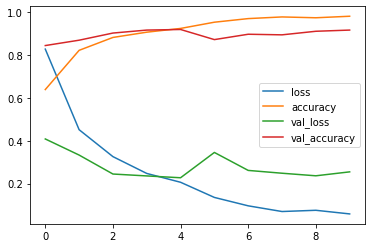

In [ ]:

from keras.preprocessing import image
test_image = image.load_img('./single_prediction/images42.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
result = np.round(result)
if result[0][0] == 1:
  prediction = 'chapati'
elif result[0][1] == 1:
  prediction = 'dosa'
elif result[0][2] == 1:
  prediction = 'idly'

In [ ]:
print(result)

print(prediction)


[[0. 0. 1.]]
idly


In [ ]:
predictions = model.predict(x=test_set, steps=len(test_set), verbose=0)

In [ ]:
np.round(predictions)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_set.class_indices

{'chapati': 0, 'dosa': 1, 'idly': 2}

Confusion matrix, without normalization
[[125  14   1]
 [  0 116   4]
 [  4   7  89]]


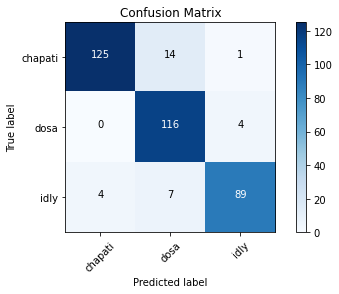

In [ ]:
cm_plot_labels = ['chapati','dosa','idly']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
y_true=test_set.classes
y_pred=np.argmax(predictions, axis=-1)
target_names=['chapati','dosa','idly']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     chapati       0.97      0.89      0.93       140
        dosa       0.85      0.97      0.90       120
        idly       0.95      0.89      0.92       100

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



In [ ]:
#cd /content/drive/My Drive/


In [ ]:
#!mkdir -p ML_Models

In [ ]:
#cd /content/drive/My Drive/ML_Models/


/content/drive/My Drive/ML_Models


In [ ]:
#model.save('VGG_foodooooo5.h5')

In [ ]:
#cd /content/drive/My Drive/


In [ ]:
#!pwd

In [ ]:
#!mkdir -p saved_model
#model.save('saved_model/my_model') 

In [ ]:
#!ls

In [ ]:
#!ls saved_model/my_model

In [ ]:
#!pwd